<a href="https://colab.research.google.com/github/janhavijaygade/Identification-of-crime-prone-areas/blob/main/Identification_of_Crime_prone_areas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Identification of Crime prone areas**


---


## Importing required libraries

---



In [62]:
import pandas as pd                   #Pandas is used to analyze data
import numpy as np                    #used to perform a wide variety of mathematical operations on arrays
import matplotlib.pyplot as plt       #for creating static and interactive visualizations
import seaborn as sns                 #for making statistical graphics

import io                             #to manage the file-related input and output operations
from google.colab import files
uploaded = files.upload()             #Uploading the file from computer
dff = pd.read_csv(io.BytesIO(uploaded['01_District_wise_crimes_committed_IPC_2001_2012.csv']))
dff.shape

Saving 01_District_wise_crimes_committed_IPC_2001_2012.csv to 01_District_wise_crimes_committed_IPC_2001_2012 (1).csv


(9017, 34)

In [63]:
dff.columns


Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'TARGET'],
      dtype='object')

In [65]:
dff.head()        #display first 5 rows of the dataset

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TARGET
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,1131,16,149,34,175,0,181,1518,4154,2
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,1543,7,118,24,154,0,270,754,4125,2
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,2088,14,112,83,186,0,404,1262,5818,2
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,795,17,126,38,57,0,233,1181,3140,2
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,1244,12,109,58,247,0,431,2313,6507,3



---


## Data cleaning and Data exploration

---



In [66]:
dff.isnull().sum()          #Checking for null values in dataset

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

In [67]:

dff.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TARGET
count,9017.000000,9017.00000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,...,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000
mean,2006.629034,89.28535,78.069646,9.895531,53.041366,0.005767,53.035599,79.152046,58.535433,20.616613,...,747.893091,20.228901,100.511257,27.515582,194.122435,0.197849,222.216702,2174.299434,5310.115116,1.471332
std,3.463623,327.27503,303.446020,59.521657,190.741450,0.115223,190.725474,317.630964,246.937464,88.586415,...,3024.106467,96.970466,394.059436,167.237522,831.986594,2.415039,936.002540,7988.438462,18524.381119,0.902700
min,2001.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,18.00000,10.000000,0.000000,8.000000,0.000000,8.000000,10.000000,6.000000,1.000000,...,43.000000,1.000000,10.000000,0.000000,11.000000,0.000000,5.000000,265.000000,853.000000,1.000000
50%,2007.000000,38.00000,28.000000,2.000000,20.000000,0.000000,20.000000,25.000000,18.000000,5.000000,...,199.000000,5.000000,31.000000,2.000000,47.000000,0.000000,68.000000,745.000000,2096.000000,2.000000
75%,2010.000000,66.00000,56.000000,6.000000,41.000000,0.000000,41.000000,56.000000,42.000000,13.000000,...,529.000000,16.000000,76.000000,13.000000,135.000000,0.000000,177.000000,1608.000000,3972.000000,2.000000
max,2012.000000,7601.00000,7964.000000,1616.000000,3425.000000,5.000000,3425.000000,8878.000000,7910.000000,2416.000000,...,56768.000000,2322.000000,7118.000000,4970.000000,19865.000000,83.000000,16076.000000,124176.000000,220335.000000,3.000000


In [68]:

dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 34 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   YEAR                                                 9017 non-null   int64 
 3   MURDER                                               9017 non-null   int64 
 4   ATTEMPT TO MURDER                                    9017 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   int64 
 6   RAPE                                                 9017 non-null   int64 
 7   CUSTODIAL RAPE                                       9017 non-null   int64 
 8   OTHER RAPE                                           9017 non-null   int64 
 9

In [69]:
#Grouping Total IPC crimes by YEAR columns and displaying in descending order
df = dff[["TOTAL IPC CRIMES", 'YEAR']]
z = df.groupby(['YEAR']).agg('sum').sort_values('TOTAL IPC CRIMES',ascending=False)
z

,TOTAL IPC CRIMES
YEAR,
2012,4774376
2011,4651150
2010,4449662
2009,4242690
2008,4186758
2007,3979346
2006,3756586
2004,3664020
2005,3645204


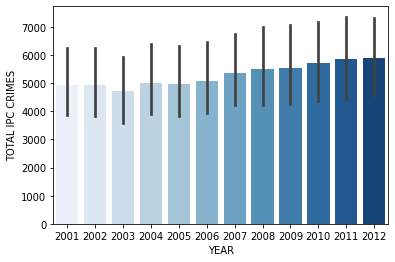

In [70]:
#Plotting barplot of Year against total IPC crimes
sns.barplot(x = 'YEAR',
            y = 'TOTAL IPC CRIMES',
            data = df,palette = "Blues")
plt.show()


---


## K-means clustering without sklearn library

---



In [71]:
#Creating crimedataframe by columns from dff 
crimedataframe = pd.DataFrame(dff, columns = ['DISTRICT', 'YEAR','MURDER', 'RAPE', 'KIDNAPPING & ABDUCTION', 'THEFT', 'HURT/GREVIOUS HURT','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 'TOTAL IPC CRIMES','TARGET'])
crimedataframe.head()

,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,THEFT,HURT/GREVIOUS HURT,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,TOTAL IPC CRIMES,TARGET
0,ADILABAD,2001,101,50,46,199,1131,149,4154,2
1,ANANTAPUR,2001,151,23,53,366,1543,118,4125,2
2,CHITTOOR,2001,101,27,59,723,2088,112,5818,2
3,CUDDAPAH,2001,80,20,25,173,795,126,3140,2
4,EAST GODAVARI,2001,82,23,49,1021,1244,109,6507,3


### *Selecting centriods*

In [79]:
#Selecting centroids with reference to the TARGET column
#loc is used to access a group of rows and columns by labels 
centroids = {}
for i in range(4):
    result_list = []
    result_list.append(crimedataframe.loc[crimedataframe['TARGET'] == i]['MURDER'].mean())
    result_list.append(crimedataframe.loc[crimedataframe['TARGET'] == i]['THEFT'].mean())
    result_list.append(crimedataframe.loc[crimedataframe['TARGET'] == i]['TOTAL IPC CRIMES'].mean())

    centroids[i] = result_list

In [80]:
centroids

{0: [9.474966170500677, 49.826116373477674, 210.50473612990527],
 1: [35.72632674297606, 161.97918834547346, 1195.9889004509191],
 2: [60.242745535714285, 464.2993861607143, 3519.740234375],
 3: [440.4598880597015, 4474.236940298508, 29391.22854477612]}

### *Plotting data points*

Text(0, 0.5, 'THEFT')

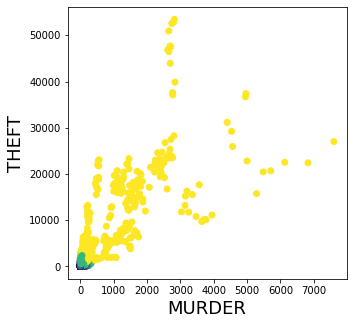

In [82]:
#Plotting all the datapoints with referance to TARGET coulmn
fig = plt.figure(figsize=(5, 5))
plt.scatter(crimedataframe['MURDER'], crimedataframe['THEFT'], c=crimedataframe['TARGET'])
plt.xlabel('MURDER', fontsize=18)
plt.ylabel('THEFT', fontsize=18)

### *Defining colors and ploting centroids for all clusters*

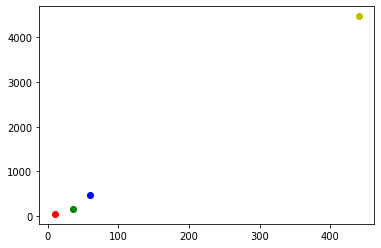

In [84]:
colmap = {0: 'r', 1: 'g', 2: 'b', 3:'y'}          #Array to assign colors to clusters
#Displaying all 4 centroids in scatter plot
for i in range(4):
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i])
plt.show()

### *Showing complete graph with centriods*

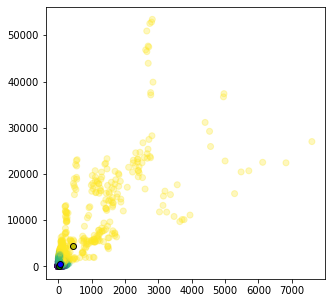

In [87]:
#Plotting datapoints
fig = plt.figure(figsize=(5, 5))
plt.scatter(crimedataframe['MURDER'], crimedataframe['THEFT'], c=crimedataframe['TARGET'],alpha = 0.3)   #alpha attribute gives the transparency of a graph
colmap = {0: 'r', 1: 'g', 2: 'b',3:'y'}         #Array to assign colors to clusters

#Plotting centriods
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], c=colmap[i], edgecolor='k')
plt.show()         #Both datapoints and centroids are displayed in one scatter plot

### *Assignment function : Calculating distance and updating dataFrame*

In [91]:
def assignment(crimedataframe, centroids):
    for i in range(4):
        # Calculating euclidean distance sqrt((x1 - x2)^2 + (y1 - y2)^2) from every cluster and adding the column to the dataframe
        crimedataframe['distance_from_{}'.format(i)] = (
            #Calculating the euclidean distance
            np.sqrt(
                (crimedataframe['MURDER'] - centroids[i][0]) ** 2
                + (crimedataframe['THEFT'] - centroids[i][1]) ** 2 
            )
        )
    
    #Finding the minimum distance and adding that cluster number to 'closest' column and the respective color to 'color' column
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    crimedataframe['closest'] = crimedataframe.loc[:, centroid_distance_cols].idxmin(axis=1)
    crimedataframe['closest'] = crimedataframe['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    crimedataframe['color'] = crimedataframe['closest'].map(lambda x: colmap[x])
    return crimedataframe

In [93]:
#Calling assignment function
crimedataframe = assignment(crimedataframe, centroids)

In [94]:
crimedataframe.head()

,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,THEFT,HURT/GREVIOUS HURT,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,TOTAL IPC CRIMES,TARGET,distance_from_0,distance_from_1,distance_from_2,distance_from_3,closest,color
0,ADILABAD,2001,101,50,46,199,1131,149,4154,2,175.013369,75.041275,268.411844,4288.692564,1,g
1,ANANTAPUR,2001,151,23,53,366,1543,118,4125,2,346.403320,234.334187,133.789568,4118.421759,2,b
2,CHITTOOR,2001,101,27,59,723,2088,112,5818,2,679.367286,564.805279,261.891507,3766.564960,2,b
3,CUDDAPAH,2001,80,20,25,173,795,126,3140,2,141.935147,45.624735,291.968631,4316.314463,1,g
4,EAST GODAVARI,2001,82,23,49,1021,1244,109,6507,3,973.878120,860.266242,557.125616,3471.791880,2,b


### *Visualisation of clusters with colors:*

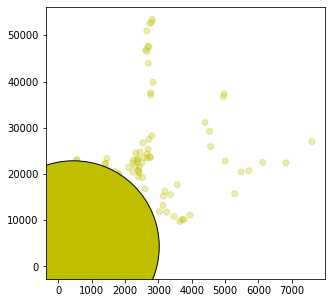

In [97]:
#Clusters with centroids with the above assigned colors
fig = plt.figure(figsize=(5, 5))
plt.scatter(crimedataframe['MURDER'], crimedataframe['THEFT'], color=crimedataframe['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')

plt.show()

### *Update function : Updating the centroids*

In [103]:
#Update function to assign the centroids with the new values with reference to 'closest' column
def update(k):
    for i in range(3):
        centroids[i][0] = np.mean(crimedataframe[crimedataframe['closest'] == i]['MURDER'])
        centroids[i][1] = np.mean(crimedataframe[crimedataframe['closest'] == i]['THEFT'])
    return k

In [104]:
#Updating centroids by calling update function
centroids = update(centroids)
centroids

{0: [18.92204724409449, 47.13622047244095, 210.50473612990527],
 1: [45.010823220728106, 193.45391931780912, 1195.9889004509191],
 2: [71.02336294833827, 709.1737413622902, 3519.740234375],
 3: [440.4598880597015, 4474.236940298508, 29391.22854477612]}

### *Visualising the graph with updated centroids*

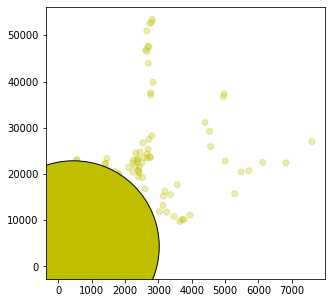

In [115]:
# Plotting graph with above updated centriods
fig = plt.figure(figsize=(5, 5))
plt.scatter(crimedataframe['MURDER'], crimedataframe['THEFT'], color=crimedataframe['color'], alpha=0.3)    #Plotting all data points
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')     #Plotting every centroid

plt.show()

### *Repeat assignment stage to to ressign the points with clusters*

In [116]:
#Reassigning all the datapoints to their new closest clusters
crimedataframe = assignment(crimedataframe, centroids)

### *Visualising the updated graph*

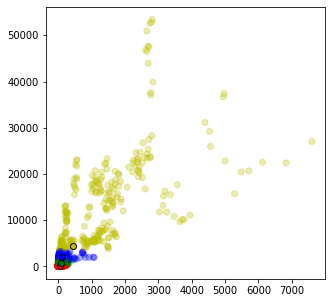

In [117]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(crimedataframe['MURDER'], crimedataframe['THEFT'], color=crimedataframe['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k')
plt.show()

### *Continuing until all assigned clusters don't change any more*

In [118]:
while True:
    closest_centroids = crimedataframe['closest'].copy(deep=True)
    centroids = update(centroids)                                 #Update the centroids
    crimedataframe = assignment(crimedataframe, centroids)        #Assign again
    if closest_centroids.equals(crimedataframe['closest']):       #If there is no change in clusters stop the reassignment
        break

## Final Result :

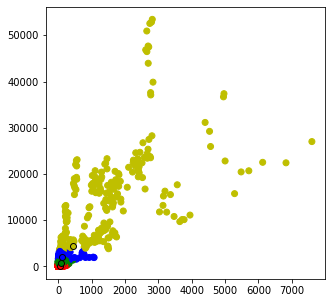

In [119]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(crimedataframe['MURDER'], crimedataframe['THEFT'], color=crimedataframe['color'])
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k')

plt.show()



---



## K-Means using sklearn library



---



In [120]:
crimedff = dff[['MURDER', 'RAPE', 'KIDNAPPING & ABDUCTION', 'THEFT', 'HURT/GREVIOUS HURT','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 'TOTAL IPC CRIMES','TARGET']]

In [ ]:
crimedff.head()

,MURDER,RAPE,KIDNAPPING & ABDUCTION,THEFT,HURT/GREVIOUS HURT,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,TOTAL IPC CRIMES,TARGET
0,101,50,46,199,1131,149,4154,2
1,151,23,53,366,1543,118,4125,2
2,101,27,59,723,2088,112,5818,2
3,80,20,25,173,795,126,3140,2
4,82,23,49,1021,1244,109,6507,3


In [ ]:
from sklearn.cluster import KMeans 

In [ ]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(crimedff)   #‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
    # data for the elbow method
    clusters_inertia.append(KM_est.inertia_)    #inertia_:Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
    # data for the Silhouette score
    silhouette_avg = silhouette_score(crimedff, KM_est.labels_)
    s_scores.append(silhouette_avg)
print("Average of all the Silhouette score of K-means is ",sum(s_scores)/len(s_scores))

Average of all the Silhouette score of K-means is  0.710879076015222


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


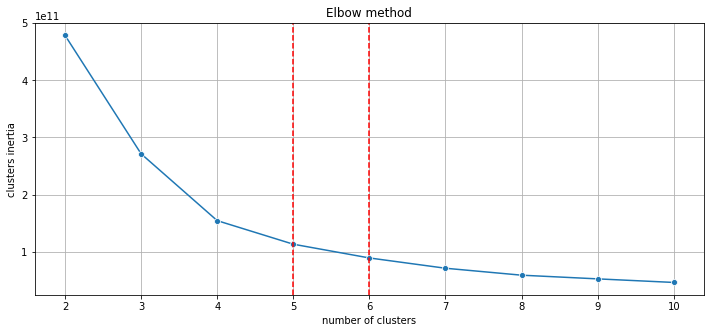

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(5, ls="--", c="red")
ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


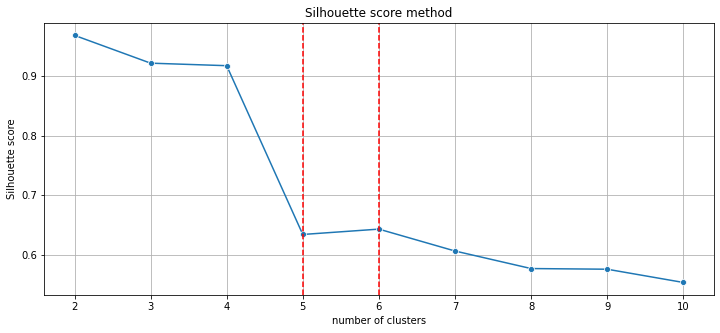

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(6, ls="--", c="red")
ax.axvline(5, ls="--", c="red")
plt.grid()
plt.show()

In [ ]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(crimedff) # initialise and fit K-Means model

KM5_clustered = crimedff.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ 

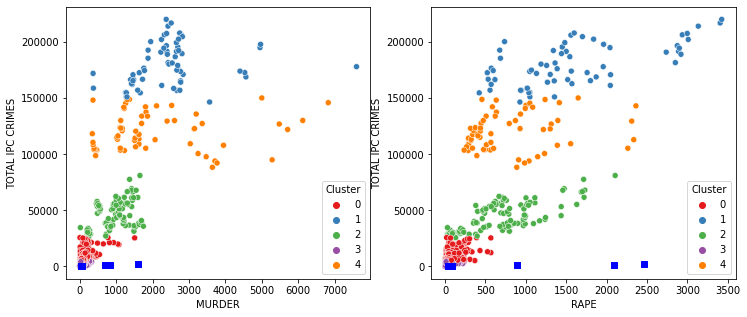

In [122]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot(x='MURDER', y='TOTAL IPC CRIMES', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(x='RAPE', y='TOTAL IPC CRIMES', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()


In [ ]:
KM_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,1415
1,63
2,114
3,7363
4,62


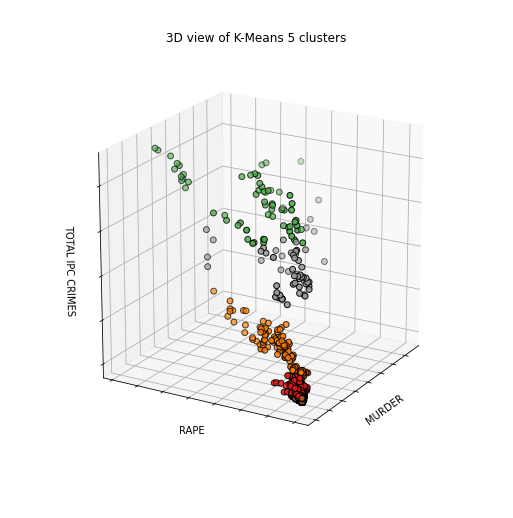

In [126]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=20, azim=210)
ax.scatter(KM5_clustered['MURDER'],
           KM5_clustered['RAPE'],
           KM5_clustered['TOTAL IPC CRIMES'],
           c=KM5_clustered['Cluster'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels(['MURDER'])
ax.w_yaxis.set_ticklabels(['RAPE'])
ax.w_zaxis.set_ticklabels(['TOTAL IPC CRIMES'])
ax.set_xlabel('MURDER')
ax.set_ylabel('RAPE')
ax.set_zlabel('TOTAL IPC CRIMES')
ax.set_title('3D view of K-Means 5 clusters')
ax.dist = 12

plt.show()

In [127]:
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['Cluster']==n]['MURDER'],
        y = db[db['Cluster']==n]['RAPE'],
        z = db[db['Cluster']==n]['TOTAL IPC CRIMES'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 5
        )
     )
trace0 = tracer(KM5_clustered, 0, 'Low crime rate')
trace1 = tracer(KM5_clustered, 1, 'Very High crime rate')
trace2 = tracer(KM5_clustered, 2, 'Average crime rate')
trace3 = tracer(KM5_clustered, 3, 'Very low crime rate')
trace4 = tracer(KM5_clustered, 4, 'High crime rate')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'MURDER'),
            yaxis = dict(title = 'RAPE'),
            zaxis = dict(title = 'TOTAL IPC CRIMES')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)


## DBScan

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
from itertools import product

eps_values = np.arange(400,500,10) # eps values to be investigated
min_samples = np.arange(5,50,5) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [ ]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(crimedff)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(crimedff, DBS_clustering.labels_))
print("Average of all the Silhouette score of DBScan is ",sum(sil_score)/len(sil_score))

Average of all the Silhouette score of DBScan is  0.6312399149310376


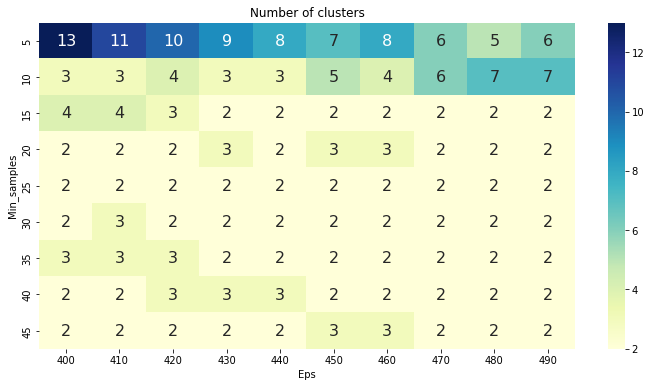

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()


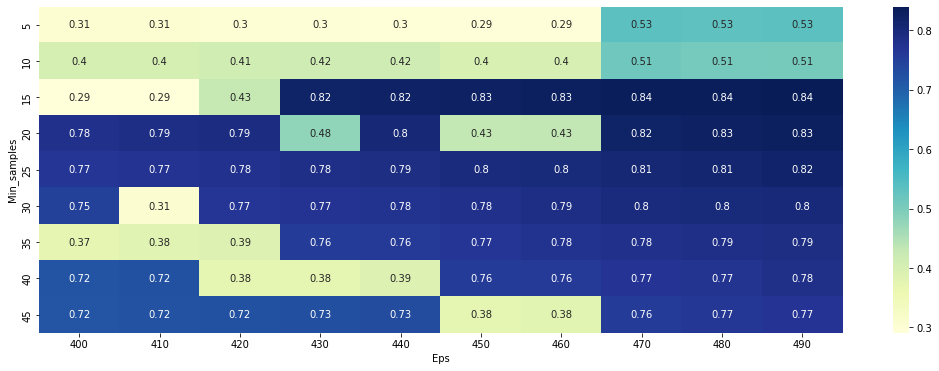

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [ ]:
DBS_clustering = DBSCAN(eps=450, min_samples=10).fit(crimedff)

DBSCAN_clustered = crimedff.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_

In [ ]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,647
0,8335
1,13
2,9
3,13


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[None, None, None, None, None, None, None, None, None, None]

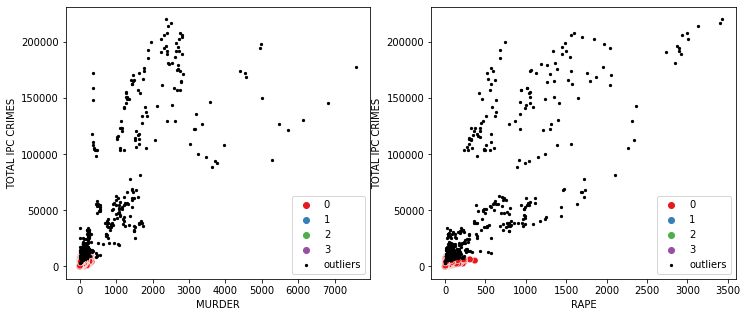

In [ ]:

outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot('MURDER', 'TOTAL IPC CRIMES',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot('RAPE', 'TOTAL IPC CRIMES',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['MURDER'], outliers['TOTAL IPC CRIMES'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['RAPE'], outliers['TOTAL IPC CRIMES'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

In [ ]:
def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['Cluster']==n]['MURDER'],
        y = db[db['Cluster']==n]['RAPE'],
        z = db[db['Cluster']==n]['TOTAL IPC CRIMES'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 5
        )
     )
trace0 = tracer(DBSCAN_clustered, -1, 'Outliers(Very High crime rate)')
trace1 = tracer(DBSCAN_clustered, 0, 'Low crime rate')
trace2 = tracer(DBSCAN_clustered, 1, 'Very Low crime rate')
trace3 = tracer(DBSCAN_clustered, 2, 'High crime rate')
trace4 = tracer(DBSCAN_clustered, 3, 'Medium crime rate')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = 'Clusters by DBSCAN',
    scene = dict(
            xaxis = dict(title = 'MURDER'),
            yaxis = dict(title = 'RAPE'),
            zaxis = dict(title = 'TOTAL IPC CRIMES')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)


## --------------------------

In [128]:
KM6_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM6_clust_sizes.columns = ["KM_size"]
KM6_clust_sizes

,KM_size
Cluster,
0,1415
1,63
2,114
3,7363
4,62


In [ ]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,647
0,8335
1,13
2,9
3,13


In [129]:
clusters = pd.concat([KM6_clust_sizes, DBSCAN_clust_sizes],axis=1, sort=False)
clusters

,KM_size,DBSCAN_size
Cluster,,
-1,NaN,647.0
0,1415.0,8335.0
1,63.0,13.0
2,114.0,9.0
3,7363.0,13.0
4,62.0,NaN
